In [1]:
import numpy as np
import scipy.io as sio
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%config Completer.use_jedi = False

RESULT_LOCATION= "/home/adwaye/matlab_projects/test_CT/Figures"
PARAM_NAMES = ["L2_mean_grad","L2_bound_grad","L2_mean_pix","L2_bound_pix","noise","ndtct","agls","grdsz","alpha",
               "grad_quantile","pix_quantile"]


def extract_params_from_name(file_name):
    # expt_name = "curated_pe_xslice_225_BUQO_problem_result"
    # file_name = "curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.1_L2_bound_grad_0.8308_L2_mean_pix_0" \
    #             ".17773_L2_bound_pix_0.0001_noise_900_ndtct_900_agls_0.35282_grdsz.mat"
    """
    
    :param expt_name: 
    :param file_name: 
    :return: 
    """
    # param_names = ["L2_mean_grad","L2_bound_grad","L2_mean_pix","L2_bound_pix","noise","ndtct","agls","grdsz"]
    out_dict   = {}
    for name in PARAM_NAMES:
        ind = file_name.find(name)
        val = file_name[0:ind].split('_')[-2]
        print(name+"="+val)
        out_dict[name] = val
    return out_dict

In [2]:
# grad_norm_name = "L2"
# M_norm_name    = "L2"
# inpainting = False
# use_dil_mask= True
# use_full_size = False

# grad_scheme_name = ""

# folder_name = ""
# if grad_scheme_name != "":
#     folder_name = '_'.join(["ct1_experiment",grad_norm_name,"gradM",grad_scheme_name,M_norm_name,"M"])
# else:
#     folder_name = '_'.join(["ct1_experiment",grad_norm_name,"gradM",M_norm_name,"M"])

# if use_full_size:
#     folder_name = '_'.join(['full_size',folder_name])

# if use_dil_mask:
#     folder_name = '_'.join([folder_name,'dil_mask'])
folder_name = "experiments_pnas"
print(folder_name)
root_folder = os.path.join("/home/adwaye/matlab_projects/test_CT/Figures",folder_name)


buqo_res_files = [os.path.join(root_folder,f) for f in os.listdir(root_folder) if f.split('.')[-1]=="mat" and "BUQO_problem_results" in f]


df = pd.DataFrame()
k = 0
rho_array = []
hpd_array = []
#boolean array that check for convergence of BUQO
M_conv_array = [] #bool if bound on M was satisfied
g_conv_array = [] #bool if bound on grad was satisfied
y_conv_array = [] #bool if bound on data fit y was satisfied
w_conv_array = [] #bool if bound on wave reg was satisfied

for fname in buqo_res_files:
    fpath = fname
    print("------------------------------------------------------")
    print(fname.split('/')[-1])
    out_dict = extract_params_from_name(fname)
    df2 = pd.DataFrame()
    
    for keys, val in out_dict.items():
        if k == 0:
            df[keys] = np.array([val],dtype=str)
            
        else:
            df2[keys] = np.array([val],dtype=str)
    splits = fpath.split('/')[-1].split('_')
    ct_slice = splits[2]+'_'+splits[3]
    if k ==0:
        df['file_name'] = fpath#os.path.split(fname,'/')[-1]
        
        df['ct_slice']  = ct_slice
    else:
        df2['file_name'] = fpath#os.path.split(fname,'/')[-1]
        df2['ct_slice']  = ct_slice
        df = df.append(df2)
    k+=1
    matfile = sio.loadmat(fpath)
    rho_array +=[matfile['rho'].ravel()[0]]
    hpd_array += [matfile['hpd_constraint'].ravel()[0]]
    M_conv_array += [ matfile['l2smooth'].ravel()[-1]< matfile['l2_bound_pix'].ravel()[0] ] 
    g_conv_array += [ matfile['smooth_max'].ravel()[-1]< matfile['l2_bound_grad'].ravel()[0] ] 
    y_conv_array += [ matfile['l2data'].ravel()[-1]< matfile['epsilon'].ravel()[0] ] 
    w_conv_array += [ matfile['l1reg'].ravel()[-1]< matfile['hpd_constraint'].ravel()[0] ] 
df['rho']  = np.array(rho_array)
df['hpd_constraint'] = hpd_array

df['agls'] = pd.to_numeric(df['agls'])
df['grad_quantile'] = pd.to_numeric(df['grad_quantile'])
df['rho'] = pd.to_numeric(df['rho'])
df['M_conv'] = M_conv_array
df['grad_conv'] = g_conv_array
df['data_conv'] = y_conv_array
df['hpd_conv']  = w_conv_array
df['BUQO_conv'] = np.array(M_conv_array)*np.array(g_conv_array)*np.array(y_conv_array)*np.array(w_conv_array)
df.index = np.arange(0,df.shape[0])

experiments_pnas
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.019403_L2_bound_grad_0.7_grad_quantile_0.84403_L2_mean_pix_0.017032_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.01_noise_450_ndtct_50_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.019403
L2_mean_pix=0.84403
L2_bound_pix=0.017032
noise=0.01
ndtct=450
agls=50
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.048002_L2_bound_grad_0.9_grad_quantile_0.80715_L2_mean_pix_0.033084_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.25_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.048002
L2_mean_pix=0.80715
L2_bound_pix=0.033084
noise=0.25
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0082553_L2_bound_grad_0.6_grad_quantile_0.83489_L2_mean_pix_0.0084849_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.05_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0082553
L2_mean_pix=0.83489
L2_bound_pix=0.0084849
noise=0.05
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0090951_L2_bound_grad_0.6_grad_quantile_0.82286_L2_mean_pix_0.01296_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.25_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0090951
L2_mean_pix=0.82286
L2_bound_pix=0.01296
noise=0.25
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_g

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.013624_L2_bound_grad_0.7_grad_quantile_0.80526_L2_mean_pix_0.014406_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.25_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.013624
L2_mean_pix=0.80526
L2_bound_pix=0.014406
noise=0.25
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.043407_L2_bound_grad_0.9_grad_quantile_0.83544_L2_mean_pix_0.065006_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.1_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.043407
L2_mean_pix=0.83544
L2_bound_pix=0.065006
noise=0.1
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012946_L2_bound_grad_0.7_grad_quantile_0.81198_L2_mean_pix_0.021305_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.012946
L2_mean_pix=0.81198
L2_bound_pix=0.021305
noise=0.175
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.016789_L2_bound_grad_0.7_grad_quantile_0.78935_L2_mean_pix_0.028241_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.016789
L2_mean_pix=0.78935
L2_bound_pix=0.028241
noise=0.175
ndtct=450
agls=50
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_gra

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.04332_L2_bound_grad_0.9_grad_quantile_0.83758_L2_mean_pix_0.063333_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.001_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.04332
L2_mean_pix=0.83758
L2_bound_pix=0.063333
noise=0.001
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.016118_L2_bound_grad_0.7_grad_quantile_0.8312_L2_mean_pix_0.018782_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.125_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.016118
L2_mean_pix=0.8312
L2_bound_pix=0.018782
noise=0.125
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012511_L2_bound_grad_0.7_grad_quantile_0.80715_L2_mean_pix_0.018357_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.25_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.012511
L2_mean_pix=0.80715
L2_bound_pix=0.018357
noise=0.25
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.018678_L2_bound_grad_0.7_grad_quantile_0.8252_L2_mean_pix_0.022651_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.25_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.018678
L2_mean_pix=0.8252
L2_bound_pix=0.022651
noise=0.25
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.04426_L2_bound_grad_0.9_grad_quantile_0.83769_L2_mean_pix_0.066774_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.075_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.04426
L2_mean_pix=0.83769
L2_bound_pix=0.066774
noise=0.075
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.01835_L2_bound_grad_0.7_grad_quantile_0.82867_L2_mean_pix_0.015777_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.2_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.01835
L2_mean_pix=0.82867
L2_bound_pix=0.015777
noise=0.2
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.05

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.011004_L2_bound_grad_0.7_grad_quantile_0.81426_L2_mean_pix_0.018531_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.125_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.011004
L2_mean_pix=0.81426
L2_bound_pix=0.018531
noise=0.125
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.01474_L2_bound_grad_0.7_grad_quantile_0.83644_L2_mean_pix_0.013861_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.01_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.01474
L2_mean_pix=0.83644
L2_bound_pix=0.013861
noise=0.01
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0063767_L2_bound_grad_0.6_grad_quantile_0.8381_L2_mean_pix_0.0079492_L2_bound_pix_0.6_pix_quantile_0.01_alpha_5e-05_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0063767
L2_mean_pix=0.8381
L2_bound_pix=0.0079492
noise=5e-05
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0086878_L2_bound_grad_0.7_grad_quantile_0.71402_L2_mean_pix_0.021852_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.15_noise_450_ndtct_25_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0086878
L2_mean_pix=0.71402
L2_bound_pix=0.021852
noise=0.15
ndtct=450
agls=25
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_g

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0057977_L2_bound_grad_0.6_grad_quantile_0.83856_L2_mean_pix_0.0074393_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.0003_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0057977
L2_mean_pix=0.83856
L2_bound_pix=0.0074393
noise=0.0003
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0074491_L2_bound_grad_0.6_grad_quantile_0.83477_L2_mean_pix_0.0083513_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.001_noise_450_ndtct_200_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0074491
L2_mean_pix=0.83477
L2_bound_pix=0.0083513
noise=0.001
ndtct=450
agls=200
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.019322_L2_bound_grad_0.7_grad_quantile_0.82737_L2_mean_pix_0.01999_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.019322
L2_mean_pix=0.82737
L2_bound_pix=0.01999
noise=0.175
ndtct=450
agls=50
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.034661_L2_bound_grad_0.9_grad_quantile_0.81282_L2_mean_pix_0.031978_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.005_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.034661
L2_mean_pix=0.81282
L2_bound_pix=0.031978
noise=0.005
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0049954_L2_bound_grad_0.6_grad_quantile_0.81407_L2_mean_pix_0.013228_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.125_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0049954
L2_mean_pix=0.81407
L2_bound_pix=0.013228
noise=0.125
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.043451_L2_bound_grad_0.9_grad_quantile_0.80973_L2_mean_pix_0.036156_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.1_noise_450_ndtct_200_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.043451
L2_mean_pix=0.80973
L2_bound_pix=0.036156
noise=0.1
ndtct=450
agls=200
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_gra

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.040506_L2_bound_grad_0.9_grad_quantile_0.80238_L2_mean_pix_0.033465_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.25_noise_450_ndtct_200_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.040506
L2_mean_pix=0.80238
L2_bound_pix=0.033465
noise=0.25
ndtct=450
agls=200
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.03684_L2_bound_grad_0.9_grad_quantile_0.79116_L2_mean_pix_0.046813_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.1_noise_450_ndtct_50_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.03684
L2_mean_pix=0.79116
L2_bound_pix=0.046813
noise=0.1
ndtct=450
agls=50
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0195

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.011654_L2_bound_grad_0.7_grad_quantile_0.81037_L2_mean_pix_0.015636_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.011654
L2_mean_pix=0.81037
L2_bound_pix=0.015636
noise=0.175
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0068954_L2_bound_grad_0.6_grad_quantile_0.81306_L2_mean_pix_0.00934_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.0003_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0068954
L2_mean_pix=0.81306
L2_bound_pix=0.00934
noise=0.0003
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.043652_L2_bound_grad_0.9_grad_quantile_0.83722_L2_mean_pix_0.062798_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.043652
L2_mean_pix=0.83722
L2_bound_pix=0.062798
noise=0.0002
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.018423_L2_bound_grad_0.7_grad_quantile_0.84391_L2_mean_pix_0.017768_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.005_noise_450_ndtct_50_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.018423
L2_mean_pix=0.84391
L2_bound_pix=0.017768
noise=0.005
ndtct=450
agls=50
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_g

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012651_L2_bound_grad_0.7_grad_quantile_0.80363_L2_mean_pix_0.020805_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.01_noise_450_ndtct_50_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.012651
L2_mean_pix=0.80363
L2_bound_pix=0.020805
noise=0.01
ndtct=450
agls=50
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.053107_L2_bound_grad_0.9_grad_quantile_0.7981_L2_mean_pix_0.080979_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.5_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.053107
L2_mean_pix=0.7981
L2_bound_pix=0.080979
noise=0.5
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0040

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0071373_L2_bound_grad_0.6_grad_quantile_0.83688_L2_mean_pix_0.0079902_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.1_noise_450_ndtct_100_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.0071373
L2_mean_pix=0.83688
L2_bound_pix=0.0079902
noise=0.1
ndtct=450
agls=100
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.010071_L2_bound_grad_0.6_grad_quantile_0.83361_L2_mean_pix_0.010641_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.125_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.010071
L2_mean_pix=0.83361
L2_bound_pix=0.010641
noise=0.125
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_g

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.004596_L2_bound_grad_0.6_grad_quantile_0.81306_L2_mean_pix_0.0081554_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.001_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.004596
L2_mean_pix=0.81306
L2_bound_pix=0.0081554
noise=0.001
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012233_L2_bound_grad_0.7_grad_quantile_0.81075_L2_mean_pix_0.018152_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.075_noise_450_ndtct_200_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.012233
L2_mean_pix=0.81075
L2_bound_pix=0.018152
noise=0.075
ndtct=450
agls=200
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean

------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.00566_L2_bound_grad_0.6_grad_quantile_0.81357_L2_mean_pix_0.0070932_L2_bound_pix_0.6_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_300_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.00566
L2_mean_pix=0.81357
L2_bound_pix=0.0070932
noise=0.0002
ndtct=450
agls=300
grdsz=0.70564
alpha=0.01
grad_quantile=0.6
pix_quantile=0.6
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012189_L2_bound_grad_0.7_grad_quantile_0.80942_L2_mean_pix_0.019902_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.2_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.012189
L2_mean_pix=0.80942
L2_bound_pix=0.019902
noise=0.2
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_gra

------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.013197_L2_bound_grad_0.7_grad_quantile_0.83734_L2_mean_pix_0.01541_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.0003_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.013197
L2_mean_pix=0.83734
L2_bound_pix=0.01541
noise=0.0003
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.7
pix_quantile=0.7
------------------------------------------------------
curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.054914_L2_bound_grad_0.9_grad_quantile_0.79534_L2_mean_pix_0.089387_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.5_noise_450_ndtct_450_agls_0.70564_grdsz.mat
L2_mean_grad=0
L2_bound_grad=0.054914
L2_mean_pix=0.79534
L2_bound_pix=0.089387
noise=0.5
ndtct=450
agls=450
grdsz=0.70564
alpha=0.01
grad_quantile=0.9
pix_quantile=0.9
------------------------------------------------------
curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_

<h1>Rho vs M</h1>

In [3]:
df1 = df.copy()
columns = ['ndtct','noise','rho','agls','grad_quantile','pix_quantile','alpha']
for col in columns:
    df1[col]=pd.to_numeric(df1[col])

bool_loc = df1['ndtct']== 450

indexes = np.where(bool_loc)
# print(indexes)

df1 = df1.loc[indexes[0].tolist()].copy()
df1 = df1.sort_values(by='agls')
df2 = df1.copy()
df2 = df2.groupby('grad_quantile').get_group(0.6)
noise_list = [0.175,0.15,0.125,0.1,0.075,0.05,0.01]
df2 = df2[df2['noise'].isin(noise_list)]
angles_list = [50,100,200,300,450]
df2 = df2[df2['agls'].isin(angles_list)]


In [4]:
df2_copy = df2.groupby("noise").get_group(0.15)
df2_copy = df2_copy.groupby("ct_slice").get_group("xslice_225")
df2_copy[['rho','agls']]

,rho,agls
321,2.520129e-14,50
20,2.484827e-14,100
309,2.469385e-14,200
149,2.456719e-14,300
183,2.436112e-14,450


In [189]:
df2_copy = df2.groupby("agls").get_group(300)
df2_copy = df2_copy.groupby("ct_slice").get_group("xslice_225")

n_colors= df2_copy['noise'].shape[0]
df2_copy['noise']

149    0.150
154    0.050
122    0.010
83     0.175
24     0.100
225    0.125
238    0.075
Name: noise, dtype: float64

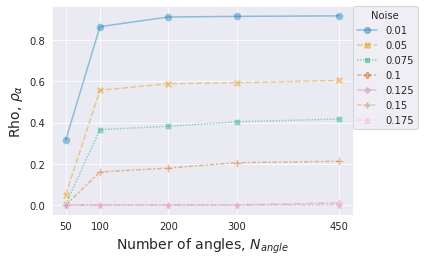

In [7]:
df2_copy = df2.groupby("agls").get_group(50)
df2_copy = df2_copy.groupby("ct_slice").get_group("xslice_225")

n_colors= df2_copy['noise'].shape[0]

df3 = df2.groupby('ct_slice')
slice_name = 'xslice_225'
df3 = df3.get_group('xslice_225')

# marker = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']
# # d = {'color': ['C0', 'k'], "ls" : ["-","--"]}
# # d = { "markers" : ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']}
d = { "ls" : [ 'dashdot', 'dashed', 'dotted', 'solid','dashdot', 'dashed', 'dotted', 'solid','dashdot', 'dashed', 'dotted', 'solid'],
      "markers" : ['o'  , 'x'     , '^'     , '+'    , '*'     , '8'     , 's'     , 'p'    , 'D'     , 'V'     ,'+'      , '*'     ]
    }
# markers = [marker[i] for i in range(len(df2["noise"].unique()))]
sns.set_style('darkgrid')
# grid = sns.FacetGrid(df2,col="ct_slice",hue="noise",hue_kws=d,#row='BUQO_conv',
#                          height=5,legend_out=True,palette=sns.color_palette("Paired")
#                     )
kwargs={'markersize':8}


fig, ax = plt.subplots()
g = sns.lineplot(ax=ax,data=df3,x="agls",y="rho",hue="noise",style="noise",markers=True,alpha=0.4,legend='auto',
                palette=sns.color_palette("colorblind", n_colors=n_colors),**kwargs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# g.add_legend()
g.axes.set_xlabel("Noise")
# grid.axes[0,0].set_title("x slice 225")
g.axes.set_ylabel("Rho, $\\rho_{\\alpha}$",fontdict={'size':14})
g.axes.set_xlabel("Number of angles, $N_{angle}$",fontdict={'size':14})
g.set_xticks([50,100,200,300,450])

# plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='32')
# # grid.axes[0,1].set_title("y slice 225")
handles, lables = g.get_legend_handles_labels()
for h in handles:
    h.set_alpha(0.4)
lgnd = plt.legend(handles, lables, bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0, title='Noise')
plt.tight_layout()
fig.subplots_adjust(top=0.9) # adjust the Figure in rp
# plt.suptitle('Rho vs number of measurements')

output_folder = "/home/adwaye/Documents/abstracts and papers/PNAS/figures"
plt.savefig(os.path.join(output_folder,slice_name+"_rho_vs_M.pdf"))

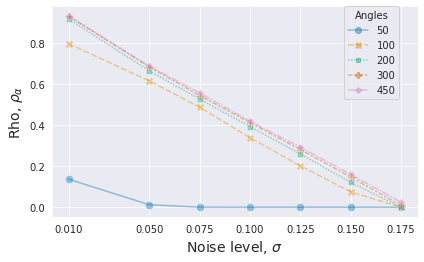

In [46]:
slice_name = 'yslice_266'
df2_copy = df2.groupby("noise").get_group(0.175)
df2_copy = df2_copy.groupby("ct_slice").get_group(slice_name)

n_colors= df2_copy['agls'].shape[0]

df3 = df2.groupby('ct_slice')

df3 = df3.get_group(slice_name)

# marker = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']
# # d = {'color': ['C0', 'k'], "ls" : ["-","--"]}
# # d = { "markers" : ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']}
d = { "ls" : [ 'dashdot', 'dashed', 'dotted', 'solid','dashdot', 'dashed', 'dotted', 'solid','dashdot', 'dashed', 'dotted', 'solid'],
      "markers" : ['o'  , 'x'     , '^'     , '+'    , '*'     , '8'     , 's'     , 'p'    , 'D'     , 'V'     ,'+'      , '*'     ]
    }
# markers = [marker[i] for i in range(len(df2["noise"].unique()))]
sns.set_style('darkgrid')
# grid = sns.FacetGrid(df2,col="ct_slice",hue="noise",hue_kws=d,#row='BUQO_conv',
#                          height=5,legend_out=True,palette=sns.color_palette("Paired")
#                     )
kwargs={'markersize':8}


fig, ax = plt.subplots()
g = sns.lineplot(ax=ax,data=df3,x="noise",y="rho",hue="agls",style="agls",markers=True,alpha=0.4,
                palette=sns.color_palette("colorblind", n_colors=n_colors),**kwargs)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# g.add_legend()
g.axes.set_xlabel("Noise")
# grid.axes[0,0].set_title("x slice 225")
g.axes.set_ylabel("Rho, $\\rho_{\\alpha}$",fontdict={'size':14})
g.axes.set_xlabel("Noise level, $\\sigma$",fontdict={'size':14})
g.set_xticks([0.01,0.05,0.075,0.1,0.125,0.15,0.175])
# grid.axes[0,1].set_title("y slice 225")

handles, lables = g.get_legend_handles_labels()
for h in handles:
    h.set_alpha(0.4)
lgnd = plt.legend(handles, lables, bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0, title='Angles')
# g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
plt.tight_layout()
fig.subplots_adjust(top=0.9) # adjust the Figure in rp
# plt.suptitle('Rho vs number of measurements')
output_folder = "/home/adwaye/Documents/abstracts and papers/PNAS/figures"
plt.savefig(os.path.join(output_folder,slice_name+"_rho_vs_noise.pdf"))

<h1>Effect of $M$ on $\rho$ </h1>


Int64Index([0, 1, 2, 3, 4], dtype='int64')
50
450


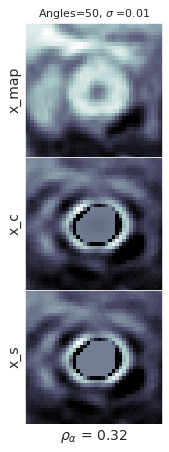

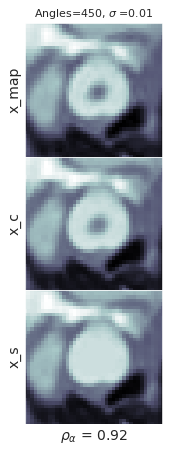

In [41]:

font_size = 14
df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.01
ct_slice = 'xslice_225'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['alpha']==alpha,
                                  df1['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='agls')
df_copy.index = np.arange(0,df_copy.shape[0])

print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for n_angles in df_copy['agls']:
    
    if n_angles==25 or n_angles==100 or n_angles==300 or n_angles == 200:
        pass
    else:
        fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(6,7))
        print(n_angles)
        index = np.where(df_copy['agls']==n_angles)
        file_name = df_copy['file_name'].loc[index].ravel()[0]
        rho       = df_copy['rho'].loc[index].ravel()[0]
        matfile  = sio.loadmat(os.path.join(root_folder,file_name))
        ax[0].imshow(matfile['xmap'],cmap="bone")

    #     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    #     ax[k,0].set_title('xmap',fontsize=font_size)
    
        ax[0].axis([lower_x,upper_x,upper_y,lower_y])
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_ylabel('x_map',fontsize=font_size)
    #     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
        ax[0].set_title('Angles={:}, $\\sigma$ ={:}'.format(n_angles,noise),fontsize=font_size-3)


        ax[1].imshow(matfile['x_c'],cmap="bone")
        ax[1].axis([lower_x,upper_x,upper_y,lower_y])
        ax[1].set_ylabel('x_c',fontsize=font_size)
        ax[1].set_xticks([])
        ax[1].set_yticks([])

        ax[2].imshow(matfile['x_s'],cmap="bone")
        ax[2].axis([lower_x,upper_x,upper_y,lower_y])
        ax[2].set_ylabel('x_s'.format(rho),fontsize=font_size)
        ax[2].set_xlabel('$\\rho_\\alpha$ = {:.2}'.format(rho),fontsize=font_size)
        ax[2].set_xticks([])
        ax[2].set_yticks([])

        fig.subplots_adjust(top=0.92)
        plt.subplots_adjust(wspace=0, hspace=0)
        fig.savefig(os.path.join(output_folder,ct_slice+"_noise_{:}_angles_{:}.pdf".format(noise,n_angles)),bbox_inches='tight',transparent=True)

        k+=1

# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    


# 
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

Int64Index([0, 1, 2, 3, 4], dtype='int64')
50
450


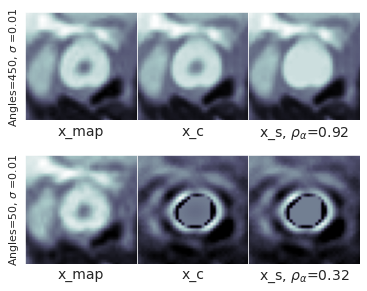

In [31]:

font_size = 14
df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.01
ct_slice = 'xslice_225'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['alpha']==alpha,
                                  df1['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='agls')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(6,5))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for n_angles in df_copy['agls']:
    if n_angles==25 or n_angles==100 or n_angles==300 or n_angles == 200:
        pass
    else:
        print(n_angles)
        index = np.where(df_copy['agls']==n_angles)
        file_name = df_copy['file_name'].loc[index].ravel()[0]
        rho       = df_copy['rho'].loc[index].ravel()[0]
        matfile  = sio.loadmat(os.path.join(root_folder,file_name))
        ax[1-k,0].imshow(matfile['xmap'],cmap="bone")    
        ax[1-k,0].axis([lower_x,upper_x,upper_y,lower_y])
        ax[1-k,0].set_xticks([])
        ax[1-k,0].set_yticks([])
        ax[1-k,0].set_xlabel('x_map',fontsize=font_size)
    #     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
        ax[1-k,0].set_ylabel('Angles={:}, $\\sigma$ ={:}'.format(n_angles,noise),fontsize=font_size-3)


        ax[1-k,1].imshow(matfile['x_c'],cmap="bone")
        ax[1-k,1].axis([lower_x,upper_x,upper_y,lower_y])
        ax[1-k,1].set_xlabel('x_c',fontsize=font_size)
        ax[1-k,1].set_xticks([])
        ax[1-k,1].set_yticks([])

        ax[1-k,2].imshow(matfile['x_s'],cmap="bone")
        ax[1-k,2].axis([lower_x,upper_x,upper_y,lower_y])
        ax[1-k,2].set_xlabel('x_s, $\\rho_\\alpha$={:.2}'.format(rho),fontsize=font_size)
        
        ax[1-k,2].set_xticks([])
        ax[1-k,2].set_yticks([])



        k+=1
fig.subplots_adjust(top=0.92)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(os.path.join(output_folder,ct_slice+"_noise_{:}_landscape.pdf".format(noise)),bbox_inches='tight',transparent=True)
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
0.01
0.15


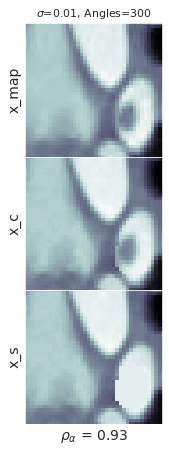

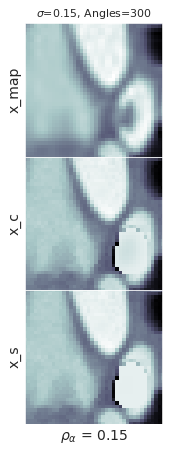

In [43]:

font_size = 14
df2.index = np.arange(0,df2.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.01
angles        = 300
ct_slice = 'yslice_266'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df2['grad_quantile'] == grad_quantile ,
                                  df2['agls']== angles, 
                                  df2['alpha']==alpha,
                                  df2['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df2.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='noise')
df_copy.index = np.arange(0,df_copy.shape[0])

print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for noise in df_copy['noise']:
    if noise==0.05 or noise==0.075 or noise==0.1 or noise==0.125 or noise==0.175 or noise==0.001  :
        pass
    else:
        fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(6,7))
        print(noise)
        index = np.where(df_copy['noise']==noise)
        file_name = df_copy['file_name'].loc[index].ravel()[0]
        rho       = df_copy['rho'].loc[index].ravel()[0]
        matfile  = sio.loadmat(os.path.join(root_folder,file_name))
        ax[0].imshow(matfile['xmap'],cmap="bone")

    #     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    #     ax[k,0].set_title('xmap',fontsize=font_size)
    
        ax[0].axis([lower_x,upper_x,upper_y,lower_y])
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_ylabel('x_map',fontsize=font_size)
    #     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
        ax[0].set_title('$\\sigma$={:}, Angles={:}'.format(noise,angles),fontsize=font_size-3)


        ax[1].imshow(matfile['x_c'],cmap="bone")
        ax[1].axis([lower_x,upper_x,upper_y,lower_y])
        ax[1].set_ylabel('x_c',fontsize=font_size)
        ax[1].set_xticks([])
        ax[1].set_yticks([])

        ax[2].imshow(matfile['x_s'],cmap="bone")
        ax[2].axis([lower_x,upper_x,upper_y,lower_y])
        ax[2].set_ylabel('x_s'.format(rho),fontsize=font_size)
        ax[2].set_xlabel('$\\rho_\\alpha$ = {:.2}'.format(rho),fontsize=font_size)
        ax[2].set_xticks([])
        ax[2].set_yticks([])
        fig.subplots_adjust(top=0.92)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
        plt.subplots_adjust(wspace=0, hspace=0)
    
        fig.savefig(os.path.join(output_folder,ct_slice+"_angles_{:}_noise_{:.2}.pdf".format(angles,noise)),bbox_inches='tight',transparent=True)
        


        k+=1

    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
0.01
0.15


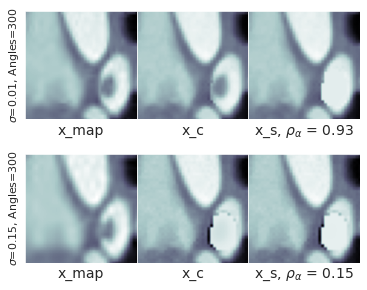

In [30]:

font_size = 14
df2.index = np.arange(0,df2.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.01
angles        = 300
ct_slice = 'yslice_266'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df2['grad_quantile'] == grad_quantile ,
                                  df2['agls']== angles, 
                                  df2['alpha']==alpha,
                                  df2['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df2.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='noise')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(6,5))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for noise in df_copy['noise']:
    if noise==0.05 or noise==0.075 or noise==0.1 or noise==0.125 or noise==0.175 or noise==0.001  :
        pass
    else:
        print(noise)
        index = np.where(df_copy['noise']==noise)
        file_name = df_copy['file_name'].loc[index].ravel()[0]
        rho       = df_copy['rho'].loc[index].ravel()[0]
        matfile  = sio.loadmat(os.path.join(root_folder,file_name))
        ax[k,0].imshow(matfile['xmap'],cmap="bone")

    #     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    #     ax[k,0].set_title('xmap',fontsize=font_size)
    
        ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
        ax[k,0].set_xticks([])
        ax[k,0].set_yticks([])
        ax[k,0].set_xlabel('x_map',fontsize=font_size)
    #     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
        ax[k,0].set_ylabel('$\\sigma$={:}, Angles={:}'.format(noise,angles),fontsize=font_size-3)


        ax[k,1].imshow(matfile['x_c'],cmap="bone")
        ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
        ax[k,1].set_xlabel('x_c',fontsize=font_size)
        ax[k,1].set_xticks([])
        ax[k,1].set_yticks([])

        ax[k,2].imshow(matfile['x_s'],cmap="bone")
        ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
        
        ax[k,2].set_xlabel('x_s, $\\rho_\\alpha$ = {:.2}'.format(rho),fontsize=font_size)
        ax[k,2].set_xticks([])
        ax[k,2].set_yticks([])
        


        k+=1
fig.subplots_adjust(top=0.92)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(os.path.join(output_folder,ct_slice+"_angles_{:}_landscape.pdf".format(angles)),bbox_inches='tight',transparent=True)
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

In [184]:
k

2

(165.0, 204.0, 200.0, 162.0)

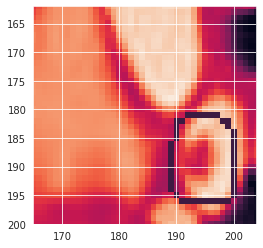

In [32]:
import cv2
image = cv2.UMat(matfile['xmap']*255)
mask = cv2.UMat(matfile['struct_mask'])
kernel = np.ones((5,5),np.uint8)
mask = cv2.dilate(mask,kernel)
tmp = cv2.UMat(np.zeros(matfile['struct_mask'].shape))
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (36, 255, 12), thickness=1)

plt.imshow( cv2.UMat.get(image))
plt.axis([lower_x,upper_x,upper_y,lower_y])


(165.0, 204.0, 200.0, 162.0)

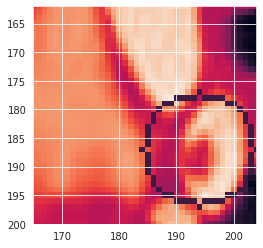

In [54]:
import cv2
image = cv2.UMat(matfile['xmap']*255)
mask = cv2.UMat(matfile['struct_mask'])
kernel = np.ones((5,5),np.uint8)
# mask = cv2.dilate(mask,kernel)
tmp = cv2.UMat(np.zeros(matfile['struct_mask'].shape))
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(image, [c], -1, (36, 255, 12), thickness=1)
center = np.mean(cv2.UMat.get(cnts[0]),axis=0).astype(np.int)

cv2.circle(image,center=(center[0,0],center[0,1]),radius=10,color=(36, 255, 12), thickness=1)
plt.imshow( cv2.UMat.get(image))
plt.axis([lower_x,upper_x,upper_y,lower_y])


In [47]:
center[0]

array([194.57142857, 186.35714286])

In [90]:
tmp = np.zeros_like(cv2.UMat(im))
boundary = cv2.drawContours(tmp, _contours, -1, (255,255,255), 1)
plt.imshow(tmp)

TypeError: Expected Ptr<cv::UMat> for argument 'image'

Int64Index([0, 1, 2, 3, 4], dtype='int64')


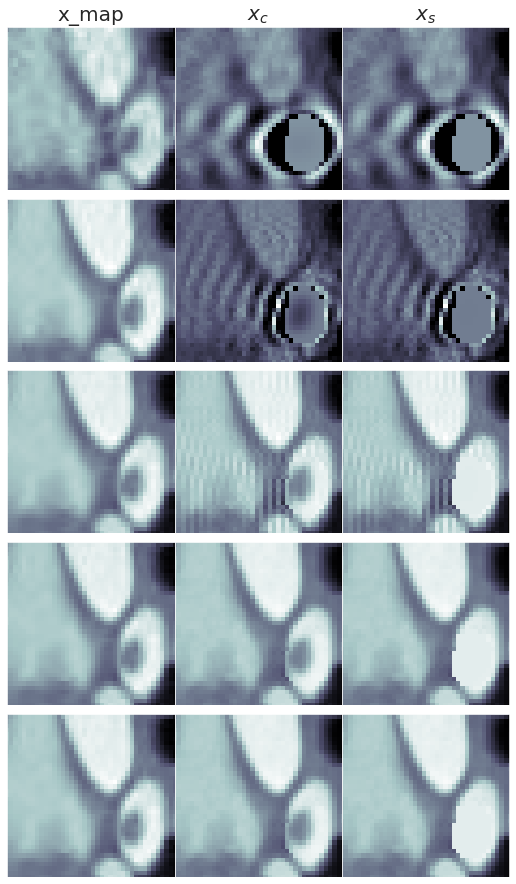

In [77]:

font_size = 20
df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.01
ct_slice = 'yslice_266'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['alpha']==alpha,
                                  df1['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='agls')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(9,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for n_angles in df_copy['agls']:
    if n_angles==25:
        pass
    else:
        index = np.where(df_copy['agls']==n_angles)
        file_name = df_copy['file_name'].loc[index].ravel()[0]
        rho       = df_copy['rho'].loc[index].ravel()[0]
        matfile  = sio.loadmat(os.path.join(root_folder,file_name))
        ax[k,0].imshow(matfile['xmap'],cmap="bone")

    #     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    #     ax[k,0].set_title('xmap',fontsize=font_size)
        ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
        ax[k,0].set_xticks([])
        ax[k,0].set_yticks([])
    #     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
    #     ax[k,0].set_ylabel('Angles={:}'.format(n_angles),fontsize=font_size-3)


        ax[k,1].imshow(matfile['x_c'],cmap="bone")
        ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    #     ax[k,1].set_title('x_c',fontsize=font_size)
        ax[k,1].set_xticks([])
        ax[k,1].set_yticks([])

        ax[k,2].imshow(matfile['x_s'],cmap="bone")
        ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    #     ax[k,2].set_title('x_s,rho={:.2}'.format(rho),fontsize=font_size)
        ax[k,2].set_xticks([])
        ax[k,2].set_yticks([])
        if k ==0:
            ax[k,0].set_title('x_map'.format(rho),fontsize=font_size)
            ax[k,1].set_title('$x_c$'.format(rho),fontsize=font_size)
            ax[k,2].set_title('$x_s$'.format(rho),fontsize=font_size)



        k+=1
fig.subplots_adjust(top=0.92)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(os.path.join(output_folder,ct_slice+"_noise_{:}.pdf".format(noise)),bbox_inches='tight')
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

In [ ]:

font_size = 20
df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.01
ct_slice = 'yslice_266'#'xslice_225', 'yslice_266'


bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['alpha']==alpha,
                                  df1['ct_slice']==ct_slice))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='agls')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(9,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for n_angles in df_copy['agls']:
    if n_angles==25:
        pass
    else:
        index = np.where(df_copy['agls']==n_angles)
        file_name = df_copy['file_name'].loc[index].ravel()[0]
        rho       = df_copy['rho'].loc[index].ravel()[0]
        matfile  = sio.loadmat(os.path.join(root_folder,file_name))
        ax[k,0].imshow(matfile['xmap'],cmap="bone")

    #     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    #     ax[k,0].set_title('xmap',fontsize=font_size)
        ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
        ax[k,0].set_xticks([])
        ax[k,0].set_yticks([])
    #     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
    #     ax[k,0].set_ylabel('Angles={:}'.format(n_angles),fontsize=font_size-3)


        ax[k,1].imshow(matfile['x_c'],cmap="bone")
        ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    #     ax[k,1].set_title('x_c',fontsize=font_size)
        ax[k,1].set_xticks([])
        ax[k,1].set_yticks([])

        ax[k,2].imshow(matfile['x_s'],cmap="bone")
        ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    #     ax[k,2].set_title('x_s,rho={:.2}'.format(rho),fontsize=font_size)
        ax[k,2].set_xticks([])
        ax[k,2].set_yticks([])
        if k ==0:
            ax[k,0].set_title('x_map'.format(rho),fontsize=font_size)
            ax[k,1].set_title('$x_c$'.format(rho),fontsize=font_size)
            ax[k,2].set_title('$x_s$'.format(rho),fontsize=font_size)



        k+=1
fig.subplots_adjust(top=0.92)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig(os.path.join(output_folder,ct_slice+"_noise_{:}.pdf".format(noise)),bbox_inches='tight')
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

<h1>Effect of noise on $\rho$</h1>

Int64Index([], dtype='int64')


<Figure size 1080x1080 with 0 Axes>

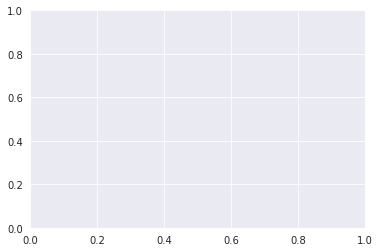

In [106]:


df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.8
agls         = 900




bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['alpha']== alpha, 
                                  df1['agls']==agls))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='noise')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(15,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for noise in df_copy['noise']:
    print(noise)
    index = np.where(df_copy['noise']==noise)
    file_name = df_copy['file_name'].loc[index].ravel()[0]
    rho       = df_copy['rho'].loc[index].ravel()[0]
    matfile  = sio.loadmat(os.path.join(root_folder,file_name))
    ax[k,0].imshow(matfile['xmap'],cmap="bone")
    ax[k,0].set_title('xmap, rho={:}'.format(rho))
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
    ax[k,0].set(ylabel='noise={:}'.format(noise))
    
    
    ax[k,1].imshow(matfile['x_c'],cmap="bone")
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_title('x_c')
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
    
    ax[k,2].imshow(matfile['x_s'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_title('x_s')
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    fig.suptitle('grad_radius={:},pix_radius={:}'.format(grad_quantile,pix_quantile)+', angles={:},alpha={:}'.format(agls,alpha))
    k+=1

    
plt.figure()
sns.lineplot(data=df_copy,x='noise',y='rho',marker='o')
plt.show()

np.unique(df1.noise)

Int64Index([], dtype='int64')


<Figure size 1080x1080 with 0 Axes>

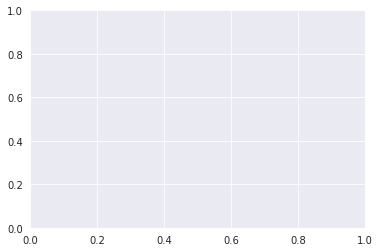

In [107]:


df1.index = np.arange(0,df1.shape[0])

grad_quantile = 0.6
pix_quantile  = 0.8
agls         = 900
noise = 0.0001



bool_loc = np.logical_and.reduce((df1['grad_quantile'] == grad_quantile ,
                                  df1['noise']== noise, 
                                  df1['agls']==agls))
indexes = np.where(bool_loc)



indexes[0].tolist()

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])



k=0
df_copy = df1.loc[indexes[0].tolist()].copy()
df_copy = df_copy.sort_values(by='alpha')
df_copy.index = np.arange(0,df_copy.shape[0])
fig, ax = plt.subplots(nrows=df_copy.shape[0],ncols=3,figsize=(15,15))
print(df_copy.index)
k = 0



mask_struct = sio.loadmat(os.path.join(root_folder,buqo_res_files[0]))['struct_mask']
row_mask,col_mask = np.where(mask_struct>0)
max_x = np.max(row_mask)
min_x = np.min(row_mask)
max_y = np.max(col_mask)
min_y = np.min(col_mask)
upper_x = max_y+15;
lower_x =  min_y-15;
upper_y = max_x+15;
lower_y = min_x-15;

for alpha in df_copy['alpha']:
    
    index = np.where(df_copy['alpha']==alpha)
    print(index)
    file_name = df_copy['file_name'].loc[index].ravel()[0]
    rho       = df_copy['rho'].loc[index].ravel()[0]
    print(rho)
    matfile  = sio.loadmat(os.path.join(root_folder,file_name))
    ax[k,0].imshow(matfile['xmap'],cmap="bone")
    ax[k,0].set_title('xmap, rho={:}'.format(rho))
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
    ax[k,0].set(ylabel='alpha={:}'.format(alpha))
    
    
    ax[k,1].imshow(matfile['x_c'],cmap="bone")
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_title('x_c')
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
    
    ax[k,2].imshow(matfile['x_s'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_title('x_c')
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    fig.suptitle('grad_radius={:},pix_radius={:}'.format(grad_quantile,pix_quantile)+', angles={:},noise={:}'.format(agls,noise))
    k+=1

    
plt.figure()
sns.lineplot(data=df_copy,x='rho',y='alpha',marker='o')
plt.show()

In [ ]:
import nrrd
import scipy.io as sio
folder = "/home/adwaye/matlab_projects/test_CT/Data/ct_scans/ct1"

ct_name = "DE_CTPA_1_5_Bv38_2_F_0.mat"
label_name = "pe_DE_CTPA_1_5_Bv38_2_F_0.mat"
ct_matfile = sio.loadmat(os.path.join(folder,ct_name))
label_matfile = sio.loadmat(os.path.join(folder,label_name))
ct = ct_matfile['array']
label = label_matfile['array']

In [ ]:
import cv2
target_folder = "/home/adwaye/matlab_projects/test_CT/DataAspax_annot/"
slice_index = 266
fig,ax = plt.subplots(ncols=3,figsize=(30,10))
ax[0].imshow(ct[:,slice_index,:])
ax[1].imshow(label[:,slice_index,:])
im = ct[:,slice_index,:]
ct_scaled = im - np.min(im)
ct_scaled = ct_scaled/(np.max(im)-np.min(im))
ct_scaled *= 255
cv2.imwrite(os.path.join(target_folder,"pe_yslice_"+str(slice_index)+".png"),ct_scaled)

In [ ]:


im_copy = im.copy()
label_mask = np.zeros(ct_scaled.shape)
outline_name = "/home/adwaye/matlab_projects/test_CT/DataAspax_annot/ct1/bone/266/heart_R_PHANTOM.txt"
outline  = np.loadtxt(outline_name)
contours = outline.astype(np.int)
cv2.fillPoly(label_mask, pts = [contours], color =(255,255,255))
cv2.polylines(im_copy, [contours], True,color =(220,0,0))


texture_mask = np.zeros(ct_scaled.shape)
outline_name = "/home/adwaye/matlab_projects/test_CT/DataAspax_annot/ct1/bone/266/heart_R_area1.txt"
outline  = np.loadtxt(outline_name)
contours = outline.astype(np.int)
cv2.fillPoly(texture_mask, pts = [contours], color =(255,255,255))
cv2.polylines(im_copy,[contours], True,color =(0,0,220))



my_dict = {}
my_dict['CT'] = im
my_dict['labels'] = label_mask
plt.figure(figsize=(20,10))
plt.imshow(im_copy)

In [ ]:
sio.savemat(file_name="/home/adwaye/matlab_projects/test_CT/Data/ct_scans/ct1/curated2_pe_yslice_"+str(slice_index)+".mat",mdict={'CT':im,
                                                                                                   'labels':label_mask,
                                                                                                    'texture_mask': texture_mask
                                                                                                    })

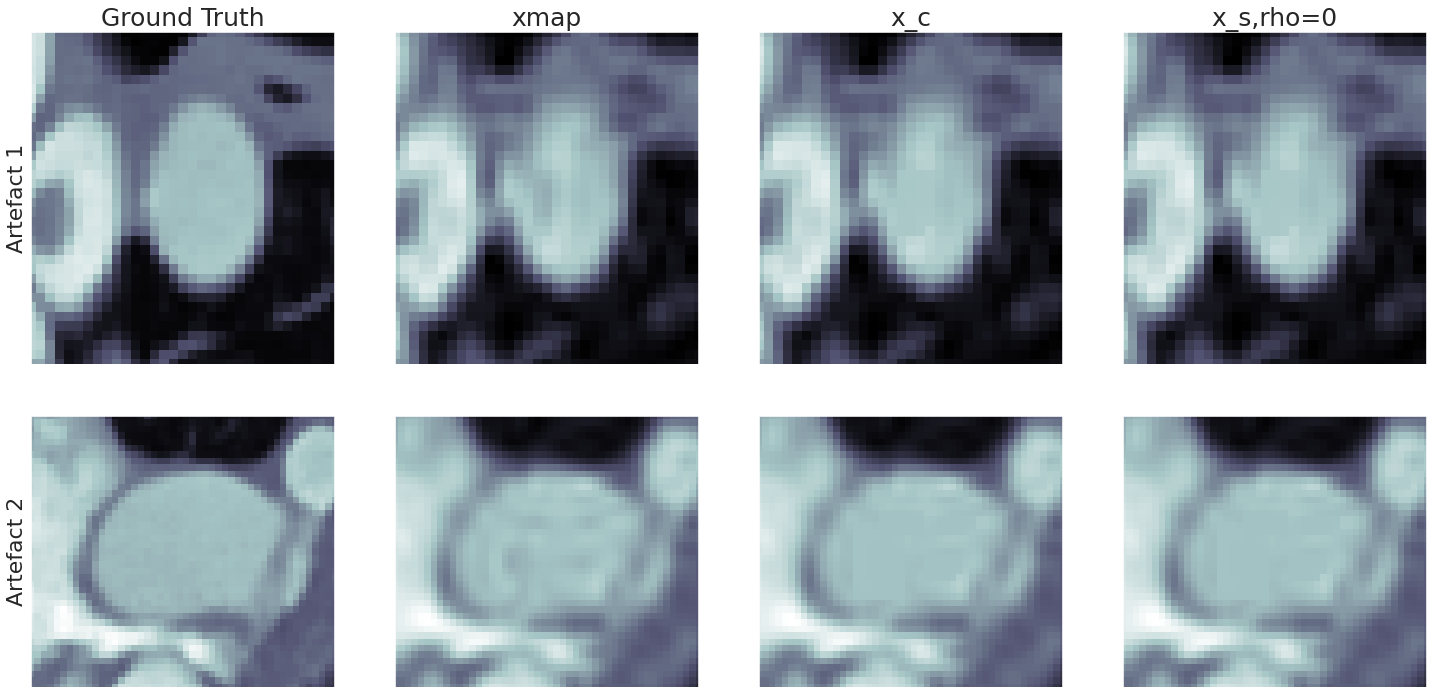

In [149]:

source_folder = "/home/adwaye/matlab_projects/test_CT/Figures/artefact_experiment_L2_gradM_L2_M"
font_size = 25
# df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.00005
ct_slice = 'xslice_225'#'xslice_225', 'yslice_266'
output_folder = "/home/adwaye/Documents/abstracts and papers/PNAS/figures"

# artefact2 = "curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012085_L2_bound_grad_0.9_grad_quantile_0.6844_L2_mean_pix_0.013819_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat"
# artefact1 = "curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.005985_L2_bound_grad_0.9_grad_quantile_0.70594_L2_mean_pix_0.016424_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat"


# artefact2 = 
# artefact1 = 

fnames = ["/home/adwaye/matlab_projects/test_CT/Data/curated2_pe_yslice_266.mat"
         ,"/home/adwaye/matlab_projects/test_CT/Data/curated2_pe_xslice_225.mat"
         ]

im_frame = []
scale_percent = 50
max_size = 350
for f in fnames:
    matfile  = sio.loadmat(f)
    im      = matfile['CT']
    im_name = f.split('/')[-1].split('.')[0]+'.png'
    imPath = os.path.join(output_folder,im_name)
    
    im_norm = im-np.min(im)
    im_norm = im_norm/(np.max(im)-np.min(im))

    width = int(im_norm.shape[1] * scale_percent / 100)
    height = int(im_norm.shape[0] * scale_percent / 100)
    dim = (width, height)
  
# resize image
    im_resized = cv2.resize(im_norm, dim, interpolation = cv2.INTER_AREA)
    
    pad_side   = (max_size-im_resized.shape[1])//2
    pad_up = (max_size-im_resized.shape[0])//2
    im_pad =  cv2.copyMakeBorder(im_resized, pad_up, pad_up, pad_side, pad_side,cv2.BORDER_CONSTANT )
    im_tosave = im_pad*255.
    cv2.imwrite(imPath,im_tosave)    
    im_frame +=[im_pad]
    
    


fnames = ["curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0099285_L2_bound_grad_0.7_grad_quantile_0.70323_L2_mean_pix_0.023557_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat"
         ,"curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0048351_L2_bound_grad_0.7_grad_quantile_0.70988_L2_mean_pix_0.01047_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat"
          ]



# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])


fig, ax = plt.subplots(ncols=len(fnames),nrows=4,figsize=(25,13))
k =0
for fname in fnames:
    matfile = sio.loadmat(os.path.join(source_folder,fname))
    mask_struct = matfile['struct_mask']
    row_mask,col_mask = np.where(mask_struct>0)
    max_x = np.max(row_mask)
    min_x = np.min(row_mask)
    max_y = np.max(col_mask)
    min_y = np.min(col_mask)
    upper_x = max_y+15;
    lower_x =  min_y-15;
    upper_y = max_x+15;
    lower_y = min_x-15;


    rho       = matfile['rho'].ravel()[0]
    
    
        
    ax[k,0].imshow(im_frame[k],cmap="bone")
#     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    ax[k,0].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,0].set_xticks([])
    ax[k,0].set_yticks([])
#     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
    ax[k,0].set_ylabel('Artefact {:}'.format(k+1),fontsize=font_size-3)
    
    
    ax[k,1].imshow(matfile['xmap'],cmap="bone")
#     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    ax[k,1].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,1].set_xticks([])
    ax[k,1].set_yticks([])
#     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
#     ax[k,0].set_ylabel('Artefact {:}'.format(k+1),fontsize=font_size-3)
    ax[k,2].imshow(matfile['x_c'],cmap="bone")
    ax[k,2].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,2].set_xticks([])
    ax[k,2].set_yticks([])
    
    ax[k,3].imshow(matfile['x_s'],cmap="bone")
    ax[k,3].axis([lower_x,upper_x,upper_y,lower_y])
    ax[k,3].set_xticks([])
    ax[k,3].set_yticks([])
    if k==0:
        ax[k,3].set_title('x_s,rho={:}'.format(rho),fontsize=font_size)
        ax[k,2].set_title('x_c',fontsize=font_size)
        ax[k,1].set_title('xmap',fontsize=font_size)
        ax[k,0].set_title('Ground Truth',fontsize=font_size)
        
    
    k+=1
# fig.subplots_adjust(top=0.9)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    

# fig.subplots_adjust(top=0.95)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
plt.subplots_adjust( hspace=0)
fig.savefig(os.path.join(output_folder,"artefacts_detect.pdf"),bbox_inches='tight')
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

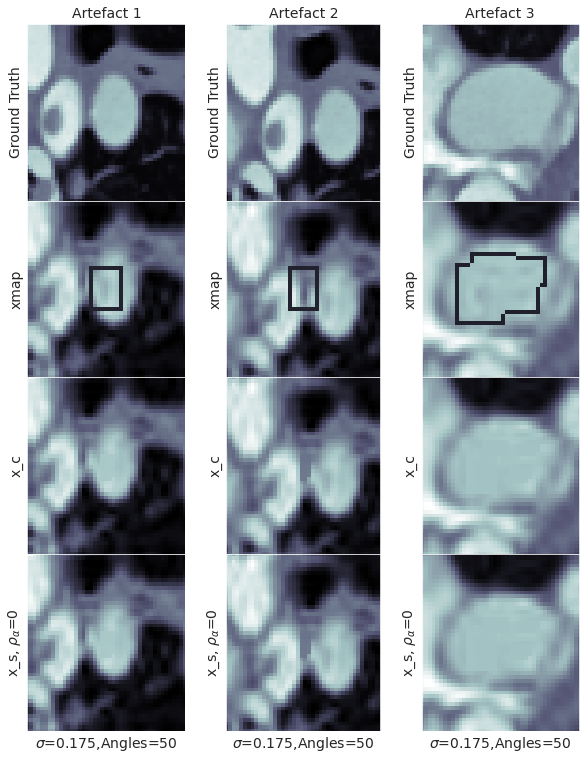

In [69]:

source_folder = "/home/adwaye/matlab_projects/test_CT/Figures/artefact_experiment_L2_gradM_L2_M"
font_size = 14
# df1.index = np.arange(0,df1.shape[0])
alpha = 0.01
grad_quantile = 0.6
pix_quantile  = 0.6
noise         = 0.00005
ct_slice = 'xslice_225'#'xslice_225', 'yslice_266'
output_folder = "/home/adwaye/Documents/abstracts and papers/PNAS/figures"

# artefact2 = "curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.012085_L2_bound_grad_0.9_grad_quantile_0.6844_L2_mean_pix_0.013819_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat"
# artefact1 = "curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.005985_L2_bound_grad_0.9_grad_quantile_0.70594_L2_mean_pix_0.016424_L2_bound_pix_0.9_pix_quantile_0.01_alpha_0.0002_noise_450_ndtct_200_agls_0.70564_grdsz.mat"


# artefact2 = 
# artefact1 = 

fnames = ["/home/adwaye/matlab_projects/test_CT/Data/curated2_pe_yslice_266.mat"
          ,"/home/adwaye/matlab_projects/test_CT/Data/curated2_pe_yslice_266.mat"
         ,"/home/adwaye/matlab_projects/test_CT/Data/curated2_pe_xslice_225.mat"
         ]

im_frame = []
scale_percent = 50
max_size = 350
for f in fnames:
    matfile  = sio.loadmat(f)
    im      = matfile['CT']
    im_name = f.split('/')[-1].split('.')[0]+'.png'
    imPath = os.path.join(output_folder,im_name)
    
    im_norm = im-np.min(im)
    im_norm = im_norm/(np.max(im)-np.min(im))

    width = int(im_norm.shape[1] * scale_percent / 100)
    height = int(im_norm.shape[0] * scale_percent / 100)
    dim = (width, height)
  
# resize image
    im_resized = cv2.resize(im_norm, dim, interpolation = cv2.INTER_AREA)
    
    pad_side   = (max_size-im_resized.shape[1])//2
    pad_up = (max_size-im_resized.shape[0])//2
    im_pad =  cv2.copyMakeBorder(im_resized, pad_up, pad_up, pad_side, pad_side,cv2.BORDER_CONSTANT )
    im_tosave = im_pad*255.
    cv2.imwrite(imPath,im_tosave)    
    im_frame +=[im_pad]
    
    


fnames = ["curated2_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.0099285_L2_bound_grad_0.7_grad_quantile_0.70323_L2_mean_pix_0.023557_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat"
         ,"curated3_pe_yslice_266_BUQO_problem_results_0_L2_mean_grad_0.02102_L2_bound_grad_0.7_grad_quantile_0.4502_L2_mean_pix_0.023327_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat"
         ,"curated2_pe_xslice_225_BUQO_problem_results_0_L2_mean_grad_0.0048351_L2_bound_grad_0.7_grad_quantile_0.70988_L2_mean_pix_0.01047_L2_bound_pix_0.7_pix_quantile_0.01_alpha_0.175_noise_450_ndtct_50_agls_0.70564_grdsz.mat"
          
          ]

noise_array = [0.175,0.175,0.175]
angles_array = [50,50,50]

# df1.loc[indexes[0].tolist()]
# df1['pix_quantile'].loc([])


fig, ax = plt.subplots(ncols=len(fnames),nrows=4,figsize=(10,13))
k =0


size_y = []
size_x = []
for fname in fnames:
    matfile = sio.loadmat(os.path.join(source_folder,fname))
    mask_struct = matfile['struct_mask']
    row_mask,col_mask = np.where(mask_struct>0)
    max_x = np.max(row_mask)
    min_x = np.min(row_mask)
    max_y = np.max(col_mask)
    min_y = np.min(col_mask)
    upper_x = max_y+15;
    lower_x =  min_y-15;
    size_y += [upper_x-lower_x]
    upper_y = max_x+15;
    lower_y = min_x-15;
    size_x += [upper_y-lower_y]

max_size_y = max(size_y)
max_size_x = max(size_x)  

    

for fname in fnames:
    
    matfile = sio.loadmat(os.path.join(source_folder,fname))
    mask_struct = matfile['struct_mask']
    row_mask,col_mask = np.where(mask_struct>0)
    max_x = np.max(row_mask)
    min_x = np.min(row_mask)
    max_y = np.max(col_mask)
    min_y = np.min(col_mask)
    upper_x = max_y+(max_size_x-(max_y-min_y))//2;
    lower_x =  min_y-(max_size_x-(max_y-min_y))//2;
    upper_y = max_x+(max_size_y-(max_x-min_x))//2;
    lower_y = min_x-(max_size_y-(max_x-min_x))//2;


    rho       = matfile['rho'].ravel()[0]
    
    
        
    ax[0,k].imshow(im_frame[k],cmap="bone")
#     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    ax[0,k].axis([lower_x,upper_x,upper_y,lower_y])
    ax[0,k].set_xticks([])
    ax[0,k].set_yticks([])
#     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
    ax[0,k].set_title('Artefact {:}'.format(k+1),fontsize=font_size)
    
    
    image = cv2.UMat(matfile['xmap']*255)
    mask = cv2.UMat(matfile['struct_mask'])
    kernel = np.ones((7,7),np.uint8)
    mask = cv2.dilate(mask,kernel)
    tmp = cv2.UMat(np.zeros(matfile['struct_mask'].shape))
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(image, [c], -1, (36, 255, 12), thickness=1)
    
    ax[1,k].imshow(cv2.UMat.get(image),cmap="bone")
#     ax[k,0].set_title('xmap, noise={:}'.format(noise),fontsize=16)
    ax[1,k].axis([lower_x,upper_x,upper_y,lower_y])
    ax[1,k].set_xticks([])
    ax[1,k].set_yticks([])
#     ax[k,0].set(ylabel='Number of angles={:}'.format(n_angles,n_angles))
#     ax[k,0].set_ylabel('Artefact {:}'.format(k+1),fontsize=font_size-3)
    ax[2,k].imshow(matfile['x_c'],cmap="bone")
    ax[2,k].axis([lower_x,upper_x,upper_y,lower_y])
    ax[2,k].set_xticks([])
    ax[2,k].set_yticks([])
    
    ax[3,k].imshow(matfile['x_s'],cmap="bone")
    ax[3,k].axis([lower_x,upper_x,upper_y,lower_y])
    ax[3,k].set_xticks([])
    ax[3,k].set_yticks([])
    
    ax[3,k].set_ylabel('x_s, $\\rho_\\alpha$={:}'.format(rho),fontsize=font_size)
    ax[3,k].set_xlabel('$\sigma$={:},Angles={:}'.format(noise_array[k],angles_array[k]),fontsize=font_size)
    ax[2,k].set_ylabel('x_c',fontsize=font_size)
    ax[1,k].set_ylabel('xmap',fontsize=font_size)
    ax[0,k].set_ylabel('Ground Truth',fontsize=font_size)

    
    k+=1
# fig.subplots_adjust(top=0.9)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    

# fig.subplots_adjust(top=0.95)
# fig.suptitle('Map estimate, image with structure and image without structure, noise={:}'.format(noise,alpha),fontsize=font_size)
    
plt.subplots_adjust( hspace=0)
fig.savefig(os.path.join(output_folder,"artefacts_detect.pdf"),bbox_inches='tight')
    
# plt.figure()
# sns.lineplot(data=df_copy,x='agls',y='rho')
# plt.show()

In [58]:
max_size_x

47